<a href="https://colab.research.google.com/github/1900690/fisheye-distortion-correction/blob/main/%E6%B5%81%E6%B0%B4%E8%A8%88%E3%81%AE%E3%83%A1%E3%83%BC%E3%82%BF%E3%83%BC%E3%81%AE%E4%BD%8D%E7%BD%AE%E5%90%88%E3%82%8F%E3%81%9B%E7%94%A8%E3%81%AE%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

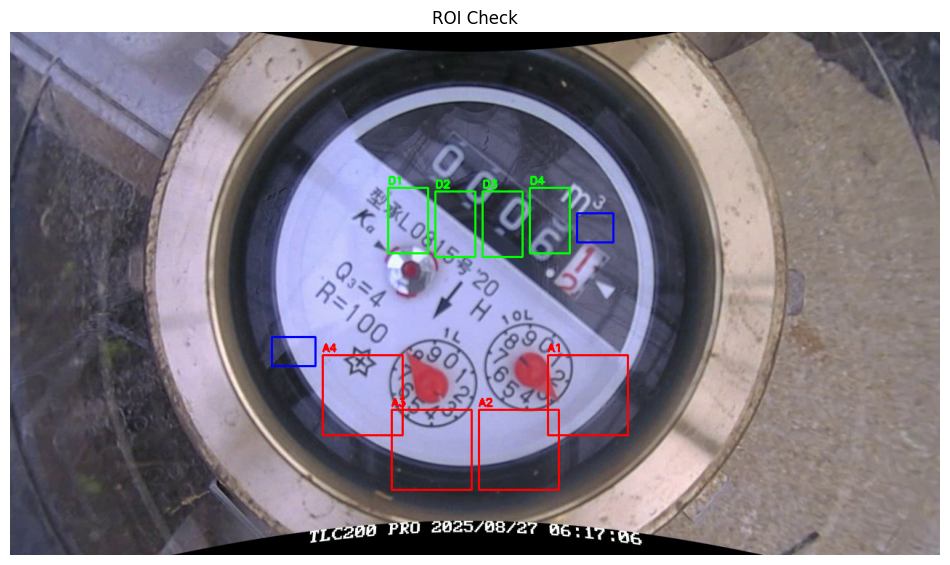

In [1]:
import cv2
import matplotlib.pyplot as plt

# 画像を読み込む (sample1.jpgのパスを指定)
img_path = "/content/sample1.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 上記で定義したROISリスト
ROIS = [
    {'label': 'D1', 'pos': (520, 215, 55, 90), 'type': 'digit'},
    {'label': 'D2', 'pos': (585, 220, 55, 90), 'type': 'digit'},
    {'label': 'D3', 'pos': (650, 220, 55, 90), 'type': 'digit'},
    {'label': 'D4', 'pos': (715, 215, 55, 90), 'type': 'digit'},
    {'label': 'A1', 'pos': (740, 445, 110, 110), 'type': 'analog'},
    {'label': 'A2', 'pos': (645, 520, 110, 110), 'type': 'analog'},
    {'label': 'A3', 'pos': (525, 520, 110, 110), 'type': 'analog'},
    {'label': 'A4', 'pos': (430, 445, 110, 110), 'type': 'analog'},
]

# 基準点（青枠）
REFS = [
    (780, 250, 50, 40), # Ref1
    (360, 420, 60, 40)  # Ref2
]

# 描画処理
for roi in ROIS:
    x, y, w, h = roi['pos']
    color = (0, 255, 0) if roi['type'] == 'digit' else (255, 0, 0) # 緑:Digital, 赤:Analog
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
    cv2.putText(img, roi['label'], (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

for (rx, ry, rw, rh) in REFS:
    cv2.rectangle(img, (rx, ry), (rx+rw, ry+rh), (0, 0, 255), 2) # 青枠: Reference

# 表示
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.title("ROI Check")
plt.show()

画像を 38 度 回転させてROIを確認します。


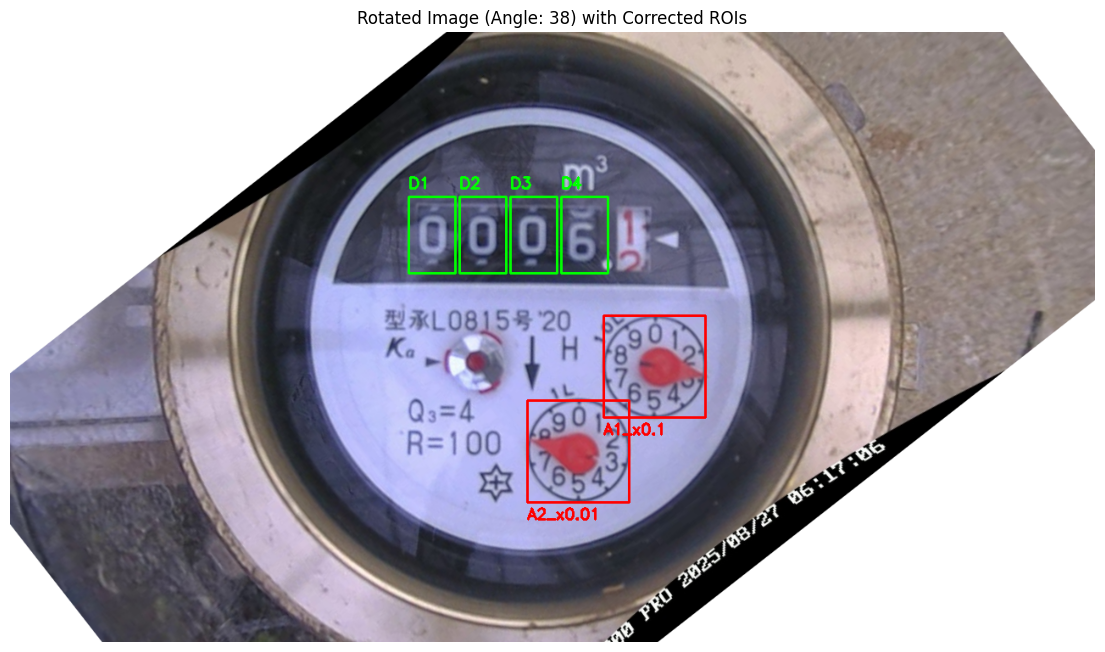

In [87]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# --- 設定：回転角度と新しい座標 ---

# 画像の回転角度（手動調整値）
# sample1.jpg は時計回りに回転しているため、反時計回り(マイナス)に回転させます
ROTATION_ANGLE = 38

# 回転補正後の画像（真っ直ぐな画像）に基づいた新しいROI座標定義
# ※画像が1280x720であることを前提としています
ROIS_CORRECTED = [
    # --- デジタル数字 (黒い4桁) ---
    # 回転によって位置が少し左上に移動します
    {'label': 'D1', 'pos': (470, 195, 55, 90), 'type': 'digit'}, # 万(0)
    {'label': 'D2', 'pos': (530, 195, 55, 90), 'type': 'digit'}, # 千(0)
    {'label': 'D3', 'pos': (590, 195, 55, 90), 'type': 'digit'}, # 十(0)
    {'label': 'D4', 'pos': (650, 195, 55, 90), 'type': 'digit'}, # 一(6)

    # --- アナログ針 (赤い2つのみ対象) ---
    # 回転によって位置が少し右上に移動します
    {'label': 'A1_x0.1',  'pos': (700, 335, 120, 120), 'type': 'analog'}, # 右の赤針
    {'label': 'A2_x0.01', 'pos': (610, 435, 120, 120), 'type': 'analog'}, # 左の赤針
]


# --- 画像処理関数 ---

def rotate_image(image, angle):
    """画像を画像の中心を軸に回転させる"""
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    # 回転行列を取得
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    # アフィン変換（回転）を実行
    rotated = cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255,255,255))
    return rotated

# --- メイン処理 ---

# 画像を読み込む (sample1.jpgのパスを指定)
img_path = "sample1.jpg"
img_org = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)

# 1. 画像を回転させて真っ直ぐにする
img_rotated = rotate_image(img_rgb, ROTATION_ANGLE)
img_display = img_rotated.copy()

# 2. 回転後の画像に枠を描画する
print(f"画像を {ROTATION_ANGLE} 度 回転させてROIを確認します。")

for roi in ROIS_CORRECTED:
    x, y, w, h = roi['pos']
    # デジタルは緑、アナログは赤で描画
    color = (0, 255, 0) if roi['type'] == 'digit' else (255, 0, 0)

    cv2.rectangle(img_display, (x, y), (x+w, y+h), color, 2)
    # ラベルを描画（文字が重ならないように少し調整）
    label_y = y - 10 if roi['type'] == 'digit' else y + h + 20
    cv2.putText(img_display, roi['label'], (x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# 表示
plt.figure(figsize=(14, 10))
plt.imshow(img_display)
plt.axis('off')
plt.title(f"Rotated Image (Angle: {ROTATION_ANGLE}) with Corrected ROIs")
plt.show()

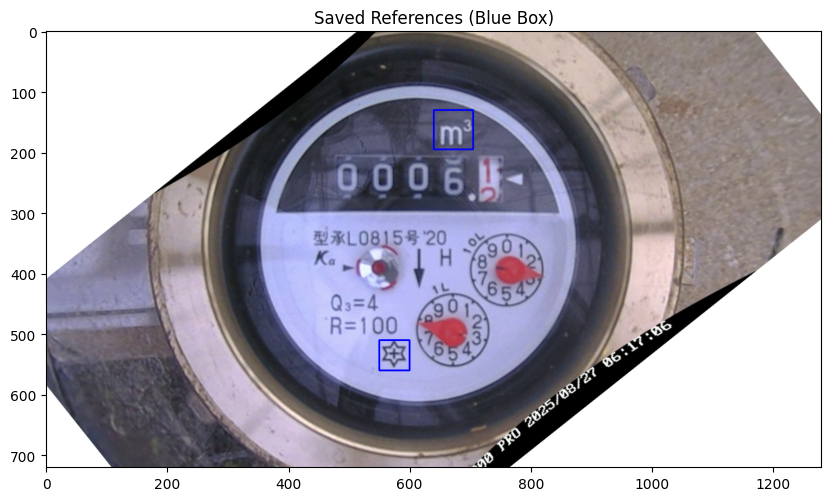

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 設定値 (ユーザー様が特定した値を採用) ---
ROTATION_ANGLE = 38.5

# 基準点として切り出す座標（回転後の画像上の座標）
# 1. 右上の「m3」
REF1_CROP = (640, 130, 65, 65)  # x, y, w, h
# 2. 左下の「R=100」
REF2_CROP = (550, 510, 50, 50)  # x, y, w, h

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    return cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255,255,255))

# 画像読み込みと回転
img = cv2.imread("sample1.jpg") # 元画像をアップロードしておいてください
img_rotated = rotate_image(img, ROTATION_ANGLE)

# 切り出し処理
x, y, w, h = REF1_CROP
ref1_img = img_rotated[y:y+h, x:x+w]
cv2.imwrite("ref_mark1.jpg", ref1_img) # 保存

x, y, w, h = REF2_CROP
ref2_img = img_rotated[y:y+h, x:x+w]
cv2.imwrite("ref_mark2.jpg", ref2_img) # 保存

# 確認表示
cv2.rectangle(img_rotated, (REF1_CROP[0], REF1_CROP[1]), (REF1_CROP[0]+REF1_CROP[2], REF1_CROP[1]+REF1_CROP[3]), (255,0,0), 2)
cv2.rectangle(img_rotated, (REF2_CROP[0], REF2_CROP[1]), (REF2_CROP[0]+REF2_CROP[2], REF2_CROP[1]+REF2_CROP[3]), (255,0,0), 2)

plt.figure(figsize=(10, 6))
plt.title("Saved References (Blue Box)")
plt.imshow(cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB))
plt.show()